# Демонстрация возможностей автоэнкодеров

## 1. Загрузка данных <a class="anchor" id="first-bullet"></a>
Используем открытый датасет: "Labeled Faces in the Wild" (LFW) (http://vis-www.cs.umass.edu/lfw/).

In [1]:
import numpy as np
import os
import pandas as pd
from skimage.io import imread 
from skimage.transform import resize 
import matplotlib.pyplot as plt

Установим необходимые атрибуты

In [2]:
attrs_name = ".\data\lfw_attributes.txt"  
images_name = ".\data\lfw-deepfunneled"
dx, dy = 80, 80
dimx, dimy = 48, 48 # Размерность изображения 

Загружаем данные

In [3]:
# Скачиваем файлы если их нет в рабочей папке 
if not os.path.exists(images_name):
    print("images not found, donwloading...")
    os.system("wget http://vis-www.cs.umass.edu/lfw/lfw-deepfunneled.tgz -O tmp.tgz")
    print("extracting...")
    os.system("tar xvzf tmp.tgz && rm tmp.tgz")
    print("done")
    assert os.path.exists(images_name)

if not os.path.exists(attrs_name):
    print("attributes not found, downloading...")
    os.system("wget http://www.cs.columbia.edu/CAVE/databases/pubfig/download/%s" % attrs_name)
    print("done")

In [201]:
# Считываем атрибуты картинок
df_attrs = pd.read_csv(attrs_name,sep='\t',skiprows=1,) 
# Удаляем последний столбец и корректируем название столбцов
df_attrs = pd.DataFrame(df_attrs.iloc[:,:-1].values, columns = df_attrs.columns[1:])
# переприсваиваеим тип np.int64 чтобы потом корректно связать два датафрейма
df_attrs['imagenum'] = df_attrs['imagenum'].astype(np.int64)

In [202]:
# Считываем фотографии
photo_ids = []
for dirpath, dirnames, filenames in os.walk(images_name):
    for fname in filenames:
        if fname.endswith(".jpg"):
            fpath = os.path.join(dirpath,fname)
            photo_id = fname[:-4].replace('_',' ').split()
            person_id = ' '.join(photo_id[:-1])
            photo_number = int(photo_id[-1])
            photo_ids.append({'person':person_id,'imagenum':photo_number,'photo_path':fpath})

photo_ids = pd.DataFrame(photo_ids)

In [203]:
# Объединяем два датафрейма по колонкам ('person','imagenum')
df = pd.merge(df_attrs,photo_ids,on=('person','imagenum'))
assert len(df)==len(df_attrs),"lost some data when merging dataframes"

In [204]:
# Производим обработку изображений
# .apply(imread) - считываем изображение из файла
# .apply(lambda img: img[dy:-dy,dx:-dx]) - берем лицо из центральной части фото
# .apply(lambda img: resize(img,[dimx,dimy]) - ресайзим до нужного размера
photos =df['photo_path'].apply(imread)\
                            .apply(lambda img: img[dy:-dy,dx:-dx])\
                            .apply(lambda img: resize(img,[dimx,dimy]))
photos = np.stack(photos.values)
attrs = df.drop(["photo_path","person","imagenum"],axis=1)

C:\Users\bulaev\AppData\Local\Continuum\anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\bulaev\AppData\Local\Continuum\anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Посмотрим на данные 

In [8]:
photos[0]

array([[[0.36153493, 0.26349571, 0.14584865],
        [0.36818321, 0.25386029, 0.14131434],
        [0.4868413 , 0.34664522, 0.236106  ],
        ...,
        [0.34117647, 0.2245098 , 0.15318627],
        [0.30539216, 0.22598039, 0.15808824],
        [0.29093137, 0.23259804, 0.17647059]],

       [[0.38828125, 0.28543199, 0.17018995],
        [0.43279718, 0.31361826, 0.20128676],
        [0.59586397, 0.45321691, 0.34390319],
        ...,
        [0.3475337 , 0.23086703, 0.1595435 ],
        [0.3084712 , 0.22905944, 0.16116728],
        [0.28553922, 0.22720588, 0.17107843]],

       [[0.40824142, 0.29745711, 0.18192402],
        [0.4921875 , 0.36519608, 0.25320159],
        [0.65505515, 0.50582108, 0.39283088],
        ...,
        [0.34863664, 0.23196998, 0.16064645],
        [0.30145527, 0.2220435 , 0.15415135],
        [0.26348039, 0.20514706, 0.14901961]],

       ...,

       [[0.63276654, 0.6386489 , 0.73465074],
        [0.68916973, 0.67323836, 0.74900429],
        [0.61620711, 0

Видим, что данные уже отнормированы по умолчанию при использовании метода from skimage.io import imread.
Посмотрим на картинку:

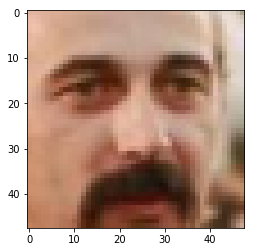

In [9]:
plt.imshow(photos[10])

In [10]:
# функция для отображения картинок
def plot_gallery(images, h, w, n_row=3, n_col=6, start = 0):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.5 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        try:
            plt.imshow(images[start + i].reshape((h, w, 3)), cmap=plt.cm.gray, vmin=-1, vmax=1, interpolation='nearest')
            plt.xticks(())
            plt.yticks(())
        except:
            pass

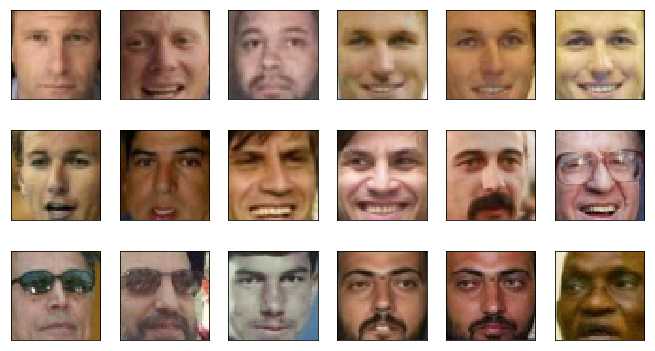

In [11]:
# Посмотрим на первые 18 картинок
plot_gallery(photos, dimx, dimy, start = 0)

Данные считались успешно, переходим к построению автоэнкодера

## 2. Построение сверточного автоэнкодера <a class="anchor" id="second-bullet"></a>
[К содержанию](#zero-bullet)

Реализуем обычный автоэнкодер (как на картинке) на основе стандартной сверточной нейронной сети.
<img src="https://i.imgur.com/nVJAtMT.png" alt="Autoencoder">

Вектор в середине (выход encoder'а) называется латентным вектором/представлением картинки.

In [205]:
IMAGE_H = photos.shape[1] # высота изображения
IMAGE_W = photos.shape[2] # ширина изображения
N_CHANNELS = photos.shape[3] # количество каналов

TRAIN_SIZE = 10000
VAL_SIZE = photos.shape[0] - TRAIN_SIZE

X_train = photos[:TRAIN_SIZE] # обучающая выборка
X_val   = photos[TRAIN_SIZE:] # валидационная выборка

Создадим сверточный автоэнкодер

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [432]:
# Определим структуру нейронной сети для энкодера
input_img = Input(shape=(IMAGE_H, IMAGE_W, N_CHANNELS))
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Сохраним shape скрытого представления для декодера
shape = K.int_shape(encoded)
# Создаем энкодер в виде объекта
encoder = Model(input_img, encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 48, 48, 8)         224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 32)          0         
__________

In [15]:
# Определим структуру нейронной сети для декодера
encoded_input = Input(shape=(shape[1], shape[2], shape[3]))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(N_CHANNELS, (3, 3), activation='sigmoid', padding='same')(x)

# Создаем энкодер в виде объекта
decoder = Model(encoded_input, decoded)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        4624      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 24, 24, 16)        0         
__________

In [16]:
# Задаем схему формирования выходных значений автоэнкодера как композицию функций 
# декодера и энкодера. Это делается для того, чтобы впоследствии создать цельную 
# модель автоэнкодера, которая затем будет настраиваться на обучающей выборке
outputs = decoder(encoder(input_img))

# Создаем автоэнкодер в виде объекта
autoencoder = Model(input_img, outputs)
autoencoder.summary()

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
model_1 (Model)              (None, 3, 3, 64)          24528     
_________________________________________________________________
model_2 (Model)              (None, 48, 48, 3)         33715     
Total params: 58,243
Trainable params: 58,243
Non-trainable params: 0
_________________________________________________________________


Обучим автоэнкодер

In [17]:
r = autoencoder.fit(X_train, X_train,
                    epochs=500,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_val, X_val))

Train on 10000 samples, validate on 3143 samples
Epoch 1/500
10000/10000 [==============================] - 6s 565us/step - loss: 0.6821 - val_loss: 0.6714
Epoch 2/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6688 - val_loss: 0.7117
Epoch 3/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6633 - val_loss: 0.6573
Epoch 4/500
10000/10000 [==============================] - 2s 201us/step - loss: 0.6577 - val_loss: 0.6481
Epoch 5/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6539 - val_loss: 0.6399
Epoch 6/500
10000/10000 [==============================] - 2s 201us/step - loss: 0.6493 - val_loss: 0.6381
Epoch 7/500
10000/10000 [==============================] - 2s 200us/step - loss: 0.6436 - val_loss: 0.6389
Epoch 8/500
10000/10000 [==============================] - 2s 201us/step - loss: 0.6406 - val_loss: 0.6371
Epoch 9/500
10000/10000 [==============================] - 2s 201us/step - loss: 0.6371 - val_l

10000/10000 [==============================] - 2s 203us/step - loss: 0.6121 - val_loss: 0.6100
Epoch 152/500
10000/10000 [==============================] - 2s 204us/step - loss: 0.6120 - val_loss: 0.6108
Epoch 153/500
10000/10000 [==============================] - 2s 205us/step - loss: 0.6122 - val_loss: 0.6121
Epoch 154/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6119 - val_loss: 0.6115
Epoch 155/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6121 - val_loss: 0.6105
Epoch 156/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6120 - val_loss: 0.6125
Epoch 157/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6120 - val_loss: 0.6124
Epoch 158/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6119 - val_loss: 0.6093
Epoch 159/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6119 - val_loss: 0.6101
Epoch 160/500
10000/10000 [======

10000/10000 [==============================] - 2s 202us/step - loss: 0.6090 - val_loss: 0.6085
Epoch 302/500
10000/10000 [==============================] - 2s 204us/step - loss: 0.6091 - val_loss: 0.6072
Epoch 303/500
10000/10000 [==============================] - 2s 204us/step - loss: 0.6091 - val_loss: 0.6082
Epoch 304/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6092 - val_loss: 0.6081
Epoch 305/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6083 - val_loss: 0.6083
Epoch 306/500
10000/10000 [==============================] - 2s 204us/step - loss: 0.6091 - val_loss: 0.6070
Epoch 307/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6089 - val_loss: 0.6070
Epoch 308/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6088 - val_loss: 0.6083
Epoch 309/500
10000/10000 [==============================] - 2s 205us/step - loss: 0.6091 - val_loss: 0.6070
Epoch 310/500
10000/10000 [======

10000/10000 [==============================] - 2s 203us/step - loss: 0.6075 - val_loss: 0.6062
Epoch 452/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6075 - val_loss: 0.6062
Epoch 453/500
10000/10000 [==============================] - 2s 204us/step - loss: 0.6077 - val_loss: 0.6059
Epoch 454/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6075 - val_loss: 0.6070
Epoch 455/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6077 - val_loss: 0.6066
Epoch 456/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6075 - val_loss: 0.6064
Epoch 457/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6076 - val_loss: 0.6064
Epoch 458/500
10000/10000 [==============================] - 2s 202us/step - loss: 0.6076 - val_loss: 0.6061
Epoch 459/500
10000/10000 [==============================] - 2s 203us/step - loss: 0.6077 - val_loss: 0.6061
Epoch 460/500
10000/10000 [======

Выведем графики по результатам обучения

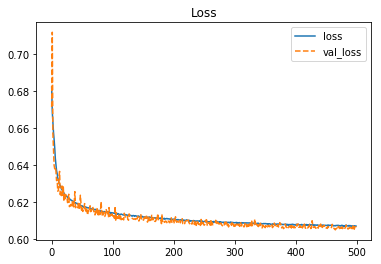

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], linestyle = "--", label='val_loss')
plt.title('Loss')
plt.legend()

Изображения из валидационной выборки


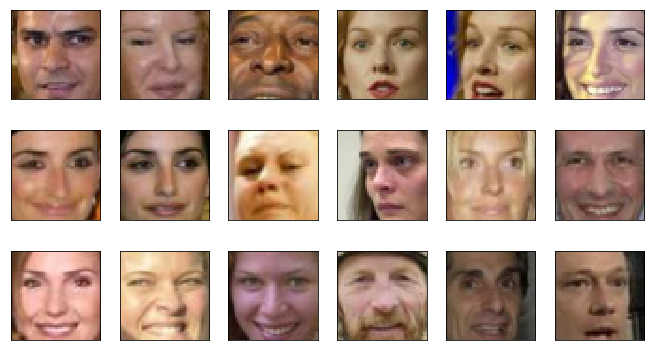

Изображения из валидационной выборки после автоэнкодера


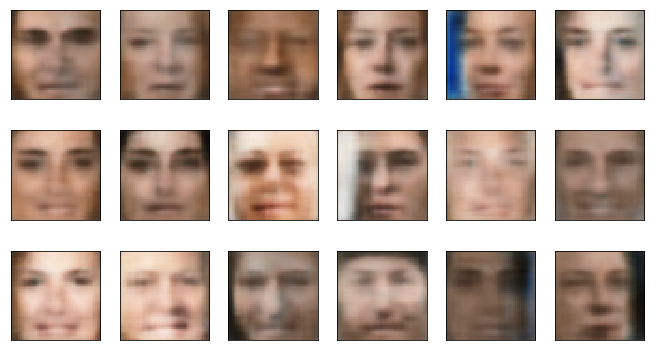

In [22]:
# Посмотрим работу автоэнкодера на валидационной выборке
encoded_imgs = encoder.predict(X_val)
decoded_imgs = decoder.predict(encoded_imgs)
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy)
plt.show()
print('Изображения из валидационной выборки после автоэнкодера')
plot_gallery(decoded_imgs, dimx, dimy)
plt.show()

## 3. Выделение признаков в латентном представлении <a class="anchor" id="third-bullet"></a>
[К содержанию](#zero-bullet)

Попробуем поэкспериментировать: научить делать улыбки на лица грустных людей.

<img src="https://i.imgur.com/tOE9rDK.png" alt="linear">

### 3.1. Вычисление необходимого вектора
План такой:

1) Нужно выделить "вектор улыбки": для этого необходимо из выборки изображений найти несколько людей с улыбками и без.

2) Вычислить латентный вектор для всех улыбающихся людей (прогнать их через encoder) и то же для всех грустных.

3) Вычислить, собственно, вектор улыбки - посчитать разность между средним латентным вектором улыбающихся людей и средним латентным вектором грустных людей

4) И в конце приделать улыбку грустному человеку: добавим полученный в пункте 3 вектор к латентному вектору грустного человека и прогоним полученный вектор через decoder. Получим того же человека, но уже не такого грустного!

В датафрейме attrs для каждой картинки указаны признаки и числовое значение.
Если признак характерен для данного фото, то он характеризуется высоким положительным числом,
если нет - но низким отрицательным числом.

In [23]:
attrs.columns

Index(['Male', 'Asian', 'White', 'Black', 'Baby', 'Child', 'Youth',
       'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair', 'Brown Hair',
       'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling',
       'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting', 'Flash',
       'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair', 'Straight Hair',
       'Receding Hairline', 'Bangs', 'Sideburns', 'Fully Visible Forehead',
       'Partially Visible Forehead', 'Obstructed Forehead', 'Bushy Eyebrows',
       'Arched Eyebrows', 'Narrow Eyes', 'Eyes Open', 'Big Nose',
       'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open',
       'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee',
       'Round Jaw', 'Double Chin', 'Wearing Hat', 'Oval Face', 'Square Face',
       'Round Face', 'Color Photo', 'Posed Photo', 'Attractive Man',
       'Attractive Woman', 'Indian', 'Gray Hair', 'Bags Under Eyes',
       'Heavy Makeup', 'Rosy Cheeks', 'Shiny Skin', 'Pa

In [24]:
# Выберем интересующий признак
feature_name = 'Smiling'

In [25]:
# Выберем из всех обучающих картинок индексы тех, для которые интересующий атрибут есть
feature_mask_1 = np.where(attrs[feature_name][:TRAIN_SIZE] > 1.5)[0]
# Выберем из всех обучающих картинок индексы тех, для которые интересующий атрибут отсутствует
feature_mask_0 = np.where(attrs[feature_name][:TRAIN_SIZE] < -1)[0]

In [26]:
# Теперь выберем по данным маскам все картинки, расчитаем вектора скрытого представления и усредним их
feature_mean_1 = encoder.predict(X_train[feature_mask_1]).reshape(-1, np.prod(shape[1:])).mean(axis = 0)
feature_mean_0 = encoder.predict(X_train[feature_mask_0]).reshape(-1, np.prod(shape[1:])).mean(axis = 0)

# Разность среднего скрытого вектор людей с нужным признаком и среднего вектора 
# людей без нужного признака дает вектор этого признака
feature_vector = (feature_mean_1 - feature_mean_0).reshape(1, shape[1], shape[2], shape[3])

Изображения из валидационной выборки


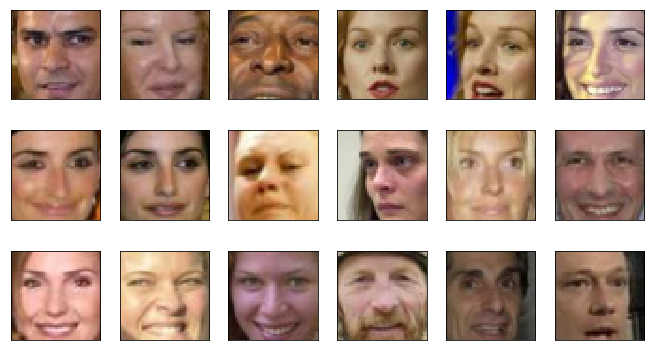

Изображения из валидационной выборки после автоэнкодера


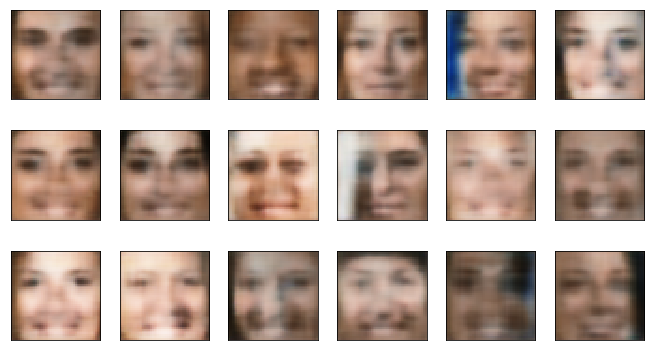

In [27]:
# Теперь прибавим к скрытому представлению валидационных изображений вектор нужного признака
encoded_imgs = encoder.predict(X_val[:18])
decoded_imgs = decoder.predict(encoded_imgs + feature_vector)
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy, start = 0)
plt.show()
print('Изображения из валидационной выборки с дорисованной улыбкой')
plot_gallery(decoded_imgs, dimx, dimy)
plt.show()

### 3.2. Сравнение автоэнкодера с РСА с таким же количеством компонент

In [30]:
from sklearn.decomposition import PCA
n_components = shape[1]*shape[2]*shape[3]
print(n_components)

576


In [34]:
pca = PCA(n_components=n_components, random_state=42)
pca.fit(X_train.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))

PCA(copy=True, iterated_power='auto', n_components=576, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

Изображения из валидационной выборки


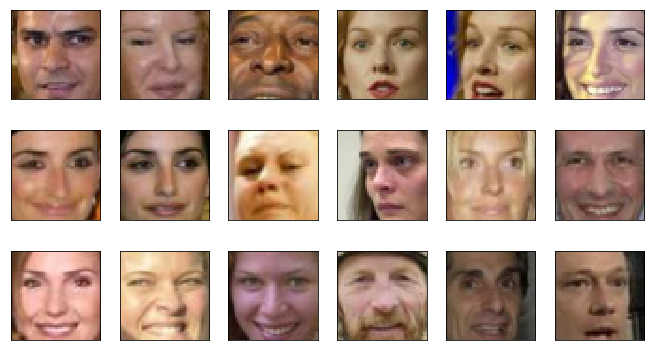

Изображения из валидационной выборки после РСА


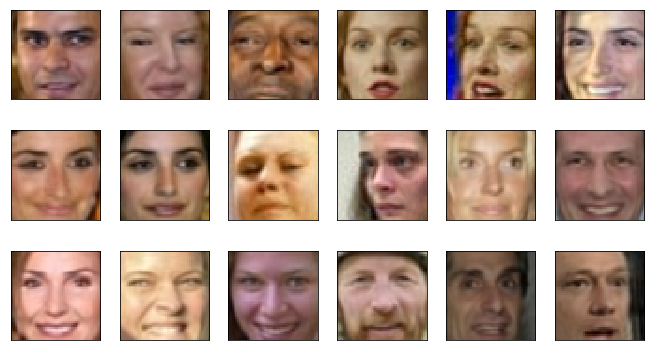

In [47]:
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy, start = 0)
plt.show()
encoded_imgs = pca.transform(X_val[:18].reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))
decoded_imgs = pca.inverse_transform(encoded_imgs).reshape(-1, IMAGE_H, IMAGE_W, N_CHANNELS).clip(0,1)
print('Изображения из валидационной выборки после РСА')
plot_gallery(decoded_imgs, dimx, dimy)
plt.show()

Как можно видеть, РСА дает более лучший результат, и за гораздо быстрое время. Попрорбуем дорисовать улыбки для РСА

In [43]:
# Теперь выберем по данным маскам все картинки, расчитаем вектора скрытого представления и усредним их
feature_mean_1 = pca.transform(X_train[feature_mask_1].reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS)).mean(axis = 0)
feature_mean_0 = pca.transform(X_train[feature_mask_0].reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS)).mean(axis = 0)

# Разность среднего скрытого вектор людей с нужным признаком и среднего вектора 
# людей без нужного признака дает вектор этого признака
feature_vector = (feature_mean_1 - feature_mean_0)
feature_vector.shape

(576,)

Изображения из валидационной выборки


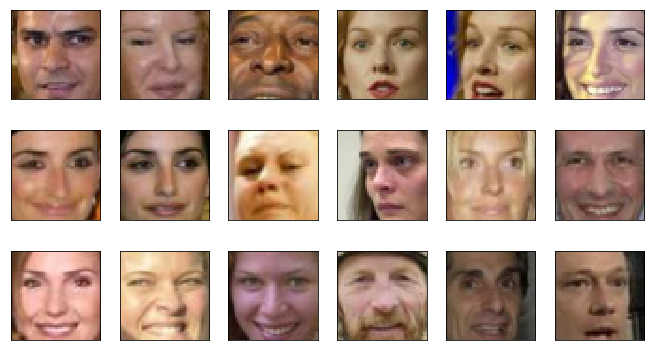

Изображения из валидационной выборки с дорисованной улыбкой на основе РСА


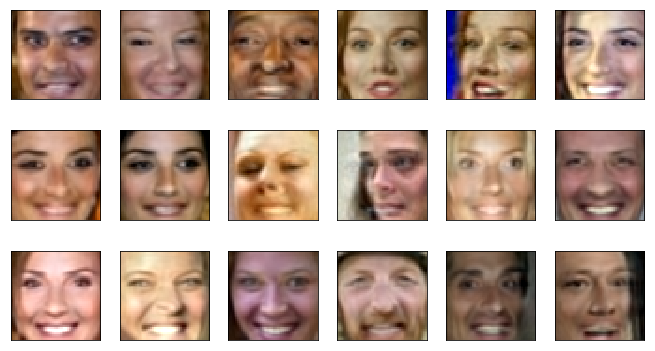

In [46]:
encoded_imgs = pca.transform(X_val[:18].reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))
decoded_imgs = pca.inverse_transform(encoded_imgs + feature_vector).reshape(-1, IMAGE_H, IMAGE_W, N_CHANNELS).clip(0,1)
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy, start = 0)
plt.show()
print('Изображения из валидационной выборки с дорисованной улыбкой на основе РСА')
plot_gallery(decoded_imgs, dimx, dimy)
plt.show()

### 3.3. Распределение скрытых векторов для автоэнкодера и РСА

Сначала закодируем обучающую выборку энкодером, затем применим к скрытым векторам РСА с числом компонент = 2

In [413]:
encoded_imgs = encoder.predict(X_train)
distribution_ae = PCA(n_components = 2, random_state = 42).fit_transform(encoded_imgs.reshape(-1, shape[1]*shape[2]*shape[3]))

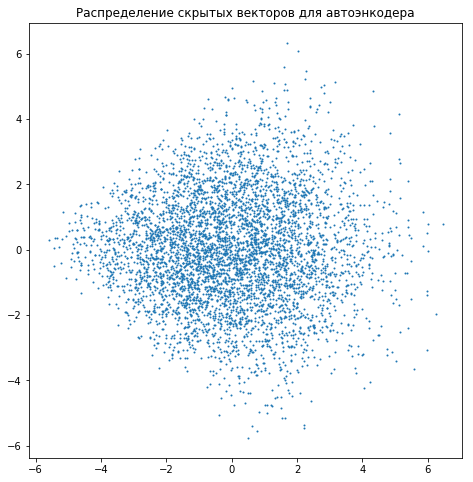

In [415]:
plt.figure(figsize=(12,8))
plt.title('Распределение скрытых векторов для автоэнкодера')
plt.scatter(distribution_ae[:,0], distribution_ae[:,1], s = 1)
plt.gca().set_aspect('equal', adjustable='box')

Теперь закодируем обучающую выборку нашим рса(), затем применим к скрытым векторам РСА с числом компонент = 2

In [411]:
encoded_imgs = pca.transform(X_train.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))
distribution_pca = PCA(n_components = 2, random_state = 42).fit_transform(encoded_imgs)

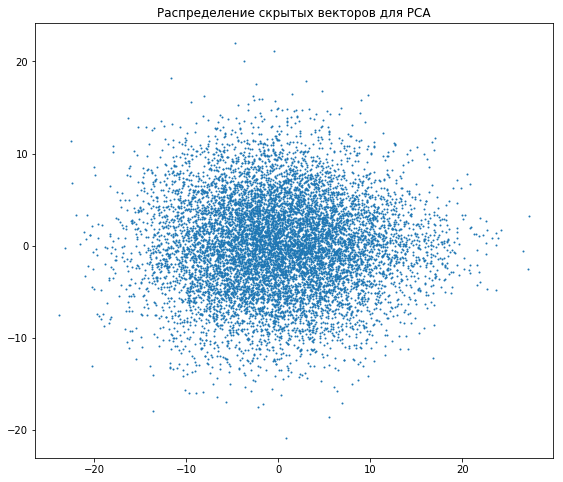

In [416]:
plt.figure(figsize=(12,8))
plt.title('Распределение скрытых векторов для РСА')
plt.scatter(distribution_pca[:,0], distribution_pca[:,1], s = 1)
plt.gca().set_aspect('equal', adjustable='box')

## 4. Генерация случайных фото <a class="anchor" id="fourth-bullet"></a>
[К содержанию](#zero-bullet)

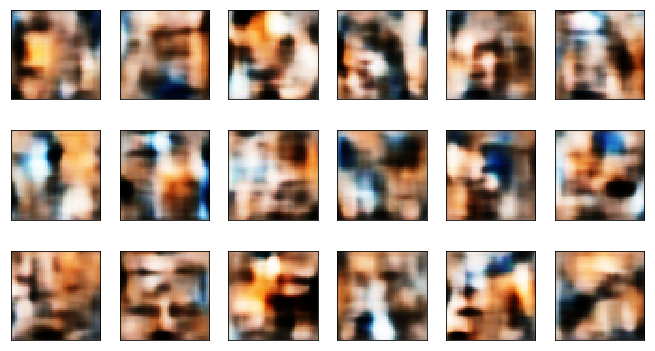

In [66]:
# Сгенерируем 18 случайных векторов и подадим их на декодер автоэнкодера
np.random.seed(42)
generated_image = decoder.predict(np.random.randn(18, shape[1], shape[2], shape[3]))
plot_gallery(generated_image, dimx, dimy)

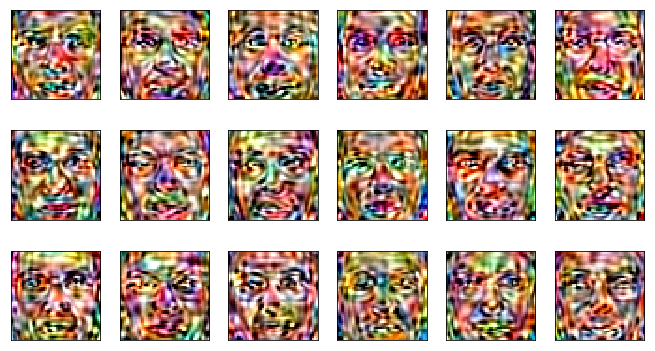

In [443]:
# Сгенерируем 18 случайных векторов и декодируем их обученным рса()
np.random.seed(42)
generated_image = pca.inverse_transform(np.random.randn(18, shape[1]*shape[2]*shape[3])).clip(0,1)
plot_gallery(generated_image.reshape(-1, IMAGE_H, IMAGE_W, N_CHANNELS), dimx, dimy)

## 5. Эксперименты с Variational Autoencoder <a class="anchor" id="fifth-bullet"></a>
[К содержанию](#zero-bullet)

Интересная статья на тему: https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf

Как было видно по приведенным выше результатам, автоэнкодер со сравнительно простой структурой не очень хорошо справился с задачей генерации данных. Поэтому для вариационного автоэнкодера было решено отказаться от слоев пулинга в пользу конволюции с шагом 2. Кроме того, было увеличено число фильтров и количество слоев свертки. Также было увеличено количество эпох и добавлены слои BatchNormalization() для ускорения обучения

In [69]:
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten 
from keras.layers import Lambda, Reshape, BatchNormalization
from keras.models import Model
from keras import backend as K

In [71]:
# Функция для сэмлинга vae
def sampling(args):
    z_mean, z_log_sigma = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

In [72]:
# Определим структуру нейронной сети для энкодера
input_img = Input(shape=(IMAGE_H, IMAGE_W, N_CHANNELS))
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(input_img)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)

# Сохраним shape скрытого представления для декодера
shape = K.int_shape(x)
latent_dim = 512 # Размерность латентных векторов для вариационного автоэнкодера

x = Flatten()(x)
#x = Dense(latent_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
#z_mean = BatchNormalization()(z_mean)
z_log_var = Dense(latent_dim)(x)
#z_log_var = BatchNormalization()(z_log_var)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Создаем декодер в виде объекта
vae_encoder = Model(input_img, [z_mean, z_log_var, z])
vae_encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 24, 24, 16)   448         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 24, 24, 16)   64          conv2d_14[0][0]                  
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 12, 12, 32)   4640        batch_normalization_5[0][0]      
__________________________________________________________________________________________________
batch_norm

In [73]:
# Определим структуру нейронной сети для декодера
encoded_input = Input(shape=(latent_dim,))
x = encoded_input
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(x)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
decoded = Conv2DTranspose(N_CHANNELS, (3, 3), activation='sigmoid', padding='same')(x)

# Создаем декодер в виде объекта
vae_decoder = Model(encoded_input, decoded)
vae_decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1152)              590976    
_________________________________________________________________
reshape_1 (Reshape)          (None, 3, 3, 128)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 3, 3, 128)         512       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 6, 6, 128)         147584    
_________________________________________________________________
batch_normalization_10 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 12, 12, 64)        73792     
__________

In [74]:
# Задаем схему формирования выходных значений автоэнкодера как композицию функций 
# декодера и энкодера. Это делается для того, чтобы впоследствии создать цельную 
# модель автоэнкодера, которая затем будет настраиваться на обучающей выборке
outputs = vae_decoder(vae_encoder(input_img)[2])

# Создаем автоэнкодер в виде объекта
vae = Model(input_img, outputs)
vae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
model_4 (Model)              [(None, 512), (None, 512) 1279072   
_________________________________________________________________
model_5 (Model)              (None, 48, 48, 3)         837347    
Total params: 2,116,419
Trainable params: 2,115,203
Non-trainable params: 1,216
_________________________________________________________________


In [75]:
# Функция потреь для вариационного автоэнкодера
def vae_loss(input_img, output):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(output-input_img))
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + 2 * z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all images in batch
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    return total_loss

vae.compile(optimizer='adadelta', loss=vae_loss)

In [76]:
r = vae.fit(X_train, X_train,
            epochs=1000,
            batch_size= 256,
            shuffle=True,
            validation_data=(X_val, X_val),
            )

Train on 10000 samples, validate on 3143 samples
Epoch 1/1000
10000/10000 [==============================] - 6s 554us/step - loss: 56618.7635 - val_loss: 34349.4111
Epoch 2/1000
10000/10000 [==============================] - 3s 305us/step - loss: 23542.7409 - val_loss: 27154.3925
Epoch 3/1000
10000/10000 [==============================] - 3s 305us/step - loss: 19667.8684 - val_loss: 40494.1506
Epoch 4/1000
10000/10000 [==============================] - 3s 307us/step - loss: 17039.7058 - val_loss: 33211.2318
Epoch 5/1000
10000/10000 [==============================] - 3s 306us/step - loss: 15627.0064 - val_loss: 37231.8549
Epoch 6/1000
10000/10000 [==============================] - 3s 307us/step - loss: 14380.5615 - val_loss: 40400.2720
Epoch 7/1000
10000/10000 [==============================] - 3s 305us/step - loss: 13388.1526 - val_loss: 44689.1546
Epoch 8/1000
10000/10000 [==============================] - 3s 307us/step - loss: 12475.1685 - val_loss: 38501.5663
Epoch 9/1000
10000/1000

Epoch 142/1000
10000/10000 [==============================] - 3s 308us/step - loss: 3790.1753 - val_loss: 4840.6440
Epoch 143/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3780.7284 - val_loss: 4116.4226
Epoch 144/1000
10000/10000 [==============================] - 3s 310us/step - loss: 3721.6396 - val_loss: 4452.9918
Epoch 145/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3840.1937 - val_loss: 4483.5250
Epoch 146/1000
10000/10000 [==============================] - 3s 308us/step - loss: 3719.5011 - val_loss: 4003.8162
Epoch 147/1000
10000/10000 [==============================] - 3s 310us/step - loss: 3818.9153 - val_loss: 4808.0240
Epoch 148/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3767.1210 - val_loss: 4467.3073
Epoch 149/1000
10000/10000 [==============================] - 3s 310us/step - loss: 3749.4191 - val_loss: 4979.7137
Epoch 150/1000
10000/10000 [==============================] - 3s 310us/s

Epoch 283/1000
10000/10000 [==============================] - 3s 311us/step - loss: 3113.9168 - val_loss: 3487.6506
Epoch 284/1000
10000/10000 [==============================] - 3s 311us/step - loss: 3134.1817 - val_loss: 3420.2722
Epoch 285/1000
10000/10000 [==============================] - 3s 308us/step - loss: 3158.2208 - val_loss: 3599.1239
Epoch 286/1000
10000/10000 [==============================] - 3s 308us/step - loss: 3130.3214 - val_loss: 3343.2030
Epoch 287/1000
10000/10000 [==============================] - 3s 311us/step - loss: 3129.6762 - val_loss: 3520.8553
Epoch 288/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3152.1935 - val_loss: 3481.8759
Epoch 289/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3106.7974 - val_loss: 3351.4050
Epoch 290/1000
10000/10000 [==============================] - 3s 309us/step - loss: 3139.0484 - val_loss: 3409.6743
Epoch 291/1000
10000/10000 [==============================] - 3s 312us/s

Epoch 424/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2869.1148 - val_loss: 3178.2858
Epoch 425/1000
10000/10000 [==============================] - 3s 307us/step - loss: 2907.8526 - val_loss: 3285.5349
Epoch 426/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2903.4186 - val_loss: 3166.9593
Epoch 427/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2912.4121 - val_loss: 3319.3888
Epoch 428/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2872.5794 - val_loss: 3142.4091
Epoch 429/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2904.2092 - val_loss: 3222.9206
Epoch 430/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2913.7331 - val_loss: 3080.9744
Epoch 431/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2902.2302 - val_loss: 3156.2874
Epoch 432/1000
10000/10000 [==============================] - 3s 310us/s

Epoch 565/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2799.9075 - val_loss: 3093.8648
Epoch 566/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2753.6242 - val_loss: 3079.1111
Epoch 567/1000
10000/10000 [==============================] - 3s 307us/step - loss: 2773.7234 - val_loss: 3028.9717
Epoch 568/1000
10000/10000 [==============================] - 3s 307us/step - loss: 2769.4872 - val_loss: 3027.8090
Epoch 569/1000
10000/10000 [==============================] - 3s 307us/step - loss: 2823.6377 - val_loss: 3003.2451
Epoch 570/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2770.1803 - val_loss: 3396.3250
Epoch 571/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2766.8865 - val_loss: 3064.9210
Epoch 572/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2743.0230 - val_loss: 3043.2923
Epoch 573/1000
10000/10000 [==============================] - 3s 308us/s

Epoch 706/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2660.2541 - val_loss: 2929.7242
Epoch 707/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2631.3987 - val_loss: 2894.6903
Epoch 708/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2667.8499 - val_loss: 2896.6536
Epoch 709/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2628.9955 - val_loss: 2916.3641
Epoch 710/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2673.6135 - val_loss: 2883.1795
Epoch 711/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2661.1869 - val_loss: 2937.2399
Epoch 712/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2649.4734 - val_loss: 2924.1131
Epoch 713/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2680.1904 - val_loss: 3010.4296
Epoch 714/1000
10000/10000 [==============================] - 3s 308us/s

Epoch 847/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2637.4680 - val_loss: 2931.3722
Epoch 848/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2634.6388 - val_loss: 2975.3029
Epoch 849/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2612.0634 - val_loss: 3338.0109
Epoch 850/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2618.9910 - val_loss: 2864.8946
Epoch 851/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2590.1619 - val_loss: 2816.5571
Epoch 852/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2589.9307 - val_loss: 2833.1937
Epoch 853/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2604.4810 - val_loss: 2930.1243
Epoch 854/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2599.3162 - val_loss: 2850.2454
Epoch 855/1000
10000/10000 [==============================] - 3s 309us/s

10000/10000 [==============================] - 3s 307us/step - loss: 2626.7980 - val_loss: 2863.7407
Epoch 988/1000
10000/10000 [==============================] - 3s 309us/step - loss: 2573.3348 - val_loss: 2863.1289
Epoch 989/1000
10000/10000 [==============================] - 3s 307us/step - loss: 2576.6577 - val_loss: 2829.6308
Epoch 990/1000
10000/10000 [==============================] - 3s 308us/step - loss: 2559.1667 - val_loss: 2905.2185
Epoch 991/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2609.7005 - val_loss: 2846.7674
Epoch 992/1000
10000/10000 [==============================] - 3s 312us/step - loss: 2590.7796 - val_loss: 2844.8971
Epoch 993/1000
10000/10000 [==============================] - 3s 311us/step - loss: 2584.7607 - val_loss: 2834.7696
Epoch 994/1000
10000/10000 [==============================] - 3s 310us/step - loss: 2590.6364 - val_loss: 2823.8407
Epoch 995/1000
10000/10000 [==============================] - 3s 310us/step - loss: 259

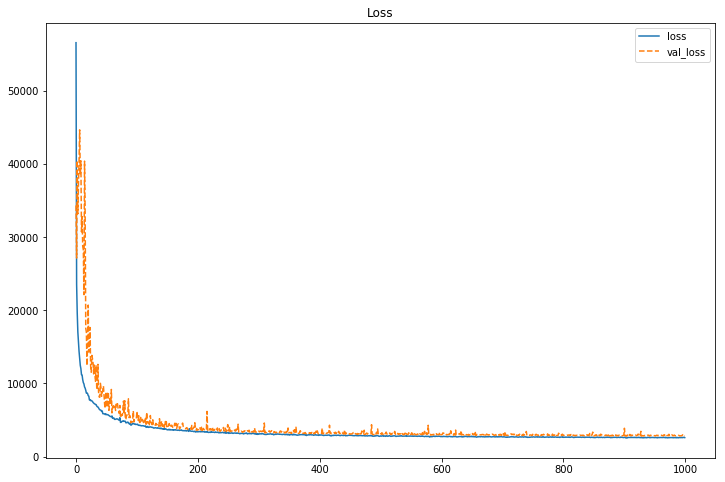

In [142]:
# Выведем график обучения
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], linestyle = "--", label='val_loss')
plt.title('Loss')
plt.legend()

В принципе достаточно было 400 эпох, далее ошибка практически не уменьшалась

Изображения из валидационной выборки


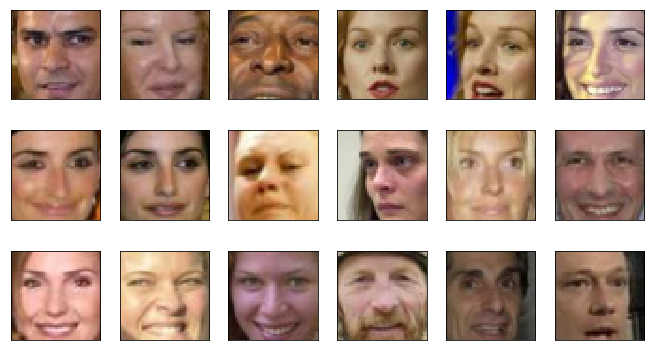

Изображения из валидационной выборки после VAE


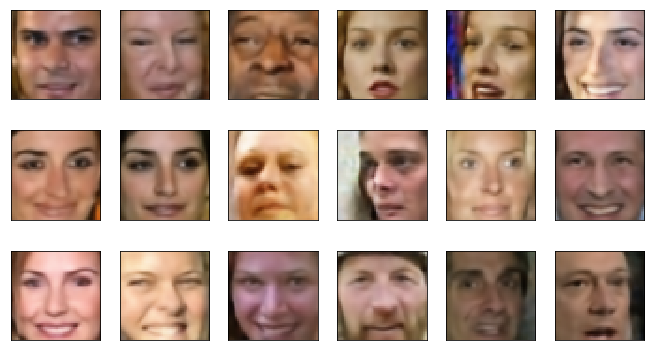

In [418]:
# Посмотрим работу автоэнкодера на валидационной выборке
encoded_imgs = vae_encoder.predict(X_val)
decoded_imgs = vae_decoder.predict(encoded_imgs[2])
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy, start = 0)
plt.show()
print('Изображения из валидационной выборки после VAE')
plot_gallery(decoded_imgs, dimx, dimy, start = 0)
plt.show()

Посмотрим на распределение скрытых векторов для VAE

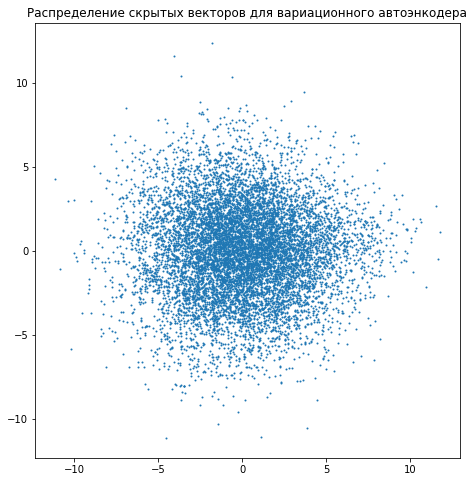

In [421]:
encoded_imgs = vae_encoder.predict(X_train)[2]
distribution_vae = PCA(n_components = 2, random_state = 42).fit_transform(encoded_imgs)
plt.figure(figsize=(12,8))
plt.title('Распределение скрытых векторов для вариационного автоэнкодера')
plt.scatter(distribution_vae[:,0], distribution_vae[:,1], s = 1)
plt.gca().set_aspect('equal', adjustable='box')

Поиграем с пририсовкой атрибутов

In [84]:
# У вариационного автоэнкодера 3 выхода: 0 - среднее значение скрытого вектора, 1 - дисперсия, 2 - сэмплированное значение
# Для того, чтобы была возможность поиграться, введем переменную enc_output, которая будет определять,
# с какого из выходов энкодера будет браться скрытое значение
enc_output = 2

In [85]:
feature_name = 'Smiling'

feature_mask_1 = np.where(attrs[feature_name][:TRAIN_SIZE] > 1.5)[0]
feature_mask_0 = np.where(attrs[feature_name][:TRAIN_SIZE] < -1.5)[0]

feature_mean_1 = vae_encoder.predict(X_train[feature_mask_1])[enc_output].mean(axis = 0)
feature_mean_0 = vae_encoder.predict(X_train[feature_mask_0])[enc_output].mean(axis = 0)

feature_vector = (feature_mean_1 - feature_mean_0)

Дорисуем атрибут

Изображения из валидационной выборки


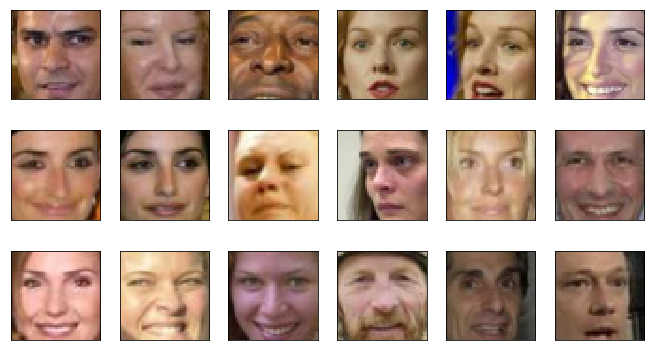

Изображения из валидационной выборки с дорисованной улыбкой VAE


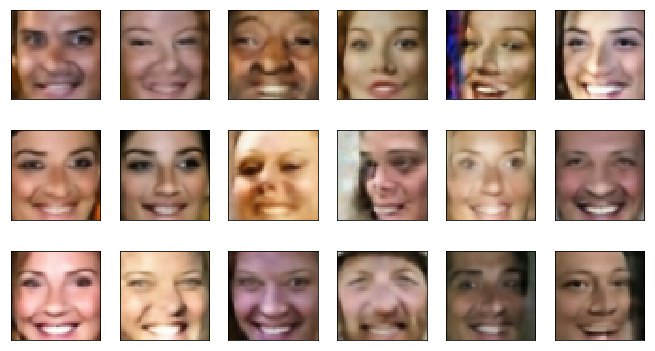

In [87]:
# Теперь прибавим к скрытому представлению валидационных изображений вектор нужного признака
encoded_imgs = vae_encoder.predict(X_val[:18])[enc_output]
decoded_imgs = vae_decoder.predict(encoded_imgs + feature_vector)
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy, start = 0)
plt.show()
print('Изображения из валидационной выборки с дорисованной улыбкой VAE')
plot_gallery(decoded_imgs, dimx, dimy)
plt.show()

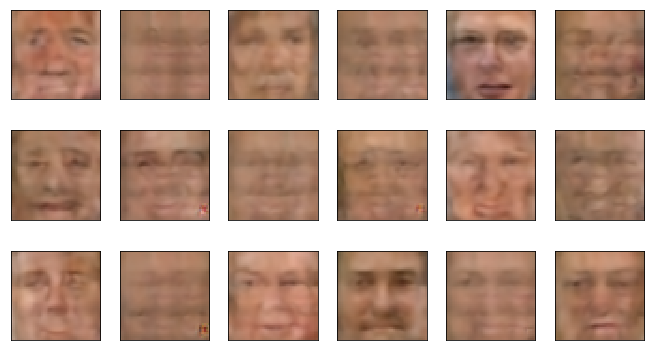

In [429]:
# Сгенерируем 18 случайных векторов и подадим их на декодер вариационного автоэнкодера
np.random.seed(2)
generated_image = vae_decoder.predict(np.random.randn(18, latent_dim))
plot_gallery(generated_image, dimx, dimy)

Изображения, сгенерированные вариационным автоэнкодером из случайных векторов, наиболее "человечные" по сравнению с РСА и обычным автоэнкодером

In [143]:
vae_encoder.save_weights('fin_vae_conv_enc.h5')
vae_decoder.save_weights('fin_vae_conv_dec.h5')
vae.save_weights('fin_vae_conv_all.h5')

## 6. Генерация промежуточных лиц <a class="anchor" id="sixth-bullet"></a>
[К содержанию](#zero-bullet)

In [94]:
image_0 = np.expand_dims(X_val[7], axis = 0)  # Начальное изображение, от которого будем идти 
image_1 = np.expand_dims(X_val[15], axis = 0) # Конечное изображение, к которому будем идти
n_steps = 18        # Количество шагов установим 18 для использования функции plot_gallery

Посмотрим на наши исходные лица

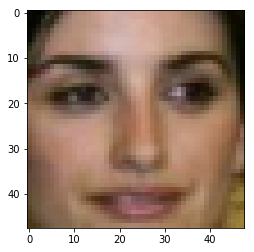

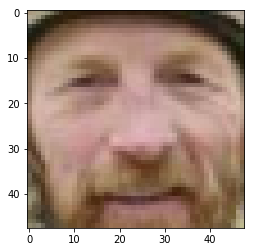

In [112]:
print('Начальное изображение')
plt.imshow(image_0.squeeze())
plt.show()
print('Конечное изображение')
plt.imshow(image_1.squeeze())
plt.show()

Получим скрытое представление для изображений и рассчитаем вектора (направления), в котором надо производить изменение.
Сделаем это для трех моделей: обычного автоэнкодера, вариационного автоэнкодера и РСА.

In [102]:
image_0_ae  = encoder.predict(image_0)     # Скрытый вектор начального изображения для автоэнкодера
# Вектор направления изменения для автоэнкодера
vector_ae   = encoder.predict(image_1) - image_0_ae
image_0_vae = vae_encoder.predict(image_0)[2] # Скрытый вектор начального изображения для вариационного автоэнкодера
# Вектор направления изменения для вариационного автоэнкодера
vector_vae  = vae_encoder.predict(image_1)[2] - image_0_vae
image_0_pca = pca.transform(image_0.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS)) # Скрытый вектор начального изображения для рса
# Вектор направления изменения для рса
vector_pca  = pca.transform(image_1.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS)) - image_0_pca

Теперь будем двигаться от скрытого представлению исходного лица к конечному лицу с шагом vector/n_steps.
Для этого для каждой из трех моделей создадим массив из n_steps = 18 изображений, полученных декодером из латентных промежуточных векторов

In [130]:
# Для обычного автоэнкодера
decoded_imgs_ae = np.zeros((n_steps, IMAGE_W, IMAGE_H, N_CHANNELS))
for i in range(len(decoded_imgs_ae)):
    decoded_imgs_ae[i] = decoder.predict(image_0_ae + (vector_ae/n_steps) * (i - 1))

In [131]:
# Для вариационного автоэнкодера
decoded_imgs_vae = np.zeros((n_steps, IMAGE_W, IMAGE_H, N_CHANNELS))
for i in range(len(decoded_imgs_ae)):
    decoded_imgs_vae[i] = vae_decoder.predict(image_0_vae + (vector_vae/n_steps) * (i - 1))

In [132]:
# Для РСА
decoded_imgs_pca = np.zeros((n_steps, IMAGE_W, IMAGE_H, N_CHANNELS))
for i in range(len(decoded_imgs_ae)):
    decoded_imgs_pca[i] = pca.inverse_transform(image_0_pca + (vector_pca/n_steps) * (i - 1)).clip(0, 1).\
    reshape(IMAGE_H, IMAGE_W, N_CHANNELS)

Промежуточные изображения для автоэнкодера


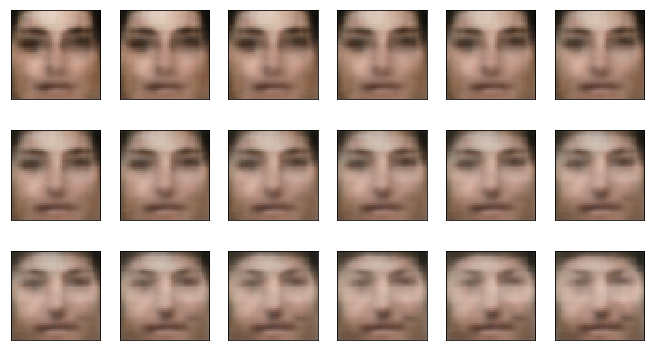

Промежуточные изображения для вариационного автоэнкодера


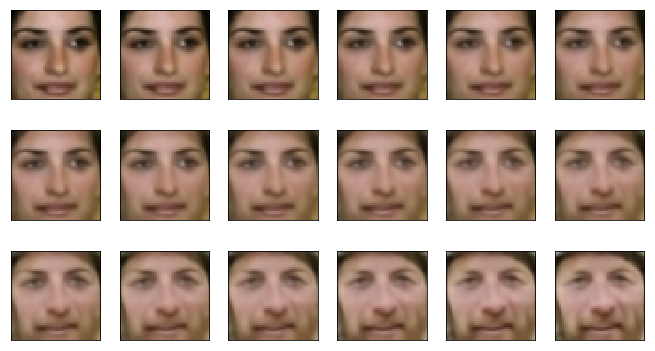

Промежуточные изображения для рса


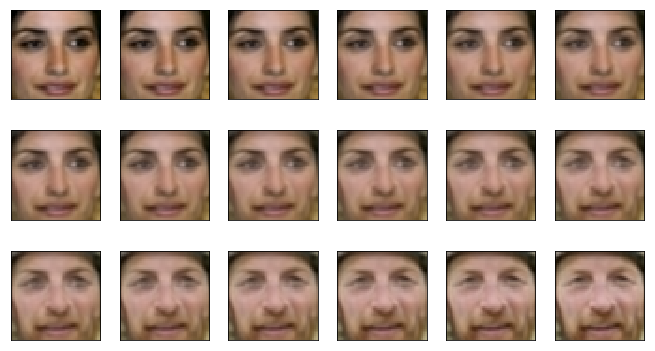

In [133]:
print('Промежуточные изображения для автоэнкодера')
plot_gallery(decoded_imgs_ae, dimx, dimy)
plt.show()
print('Промежуточные изображения для вариационного автоэнкодера')
plot_gallery(decoded_imgs_vae, dimx, dimy)
plt.show()
print('Промежуточные изображения для рса')
plot_gallery(decoded_imgs_pca, dimx, dimy)
plt.show()

Вариационный автоэнкодер дает более плавные и более "человеческие" переходы по сравнению с другими моделями

## 7. Восстановление лиц с зачерненными участками <a class="anchor" id="seventh-bullet"></a>
[К содержанию](#zero-bullet)

Исследуем возможности автоэнкодеров по восстановлению отсутствующей части сигнала. Для этого обнулим изображение в некоторой области, получим эффект наложения черного прямоугольника на изображение.

### 7.1. Использование обычного автоэнкодера и РСА

In [ ]:
box_h, box_w = 12, 28 # высота и ширина черного прямоугольника
box_x, box_y = 36, 10 # начальная координата прямоугольника

Лица с зачернеными участками


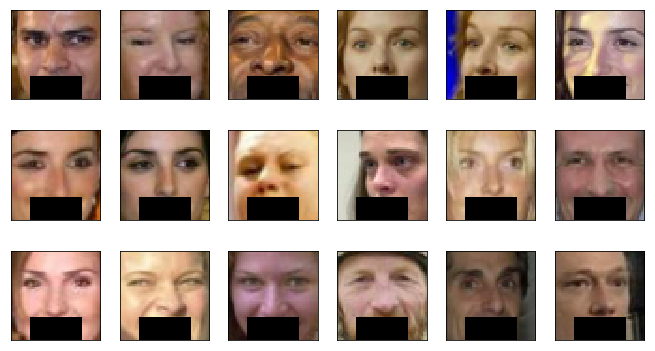

In [219]:
generated_image = np.copy(X_val[:18]) # копируем данные чтобы не испортить исходный массив
generated_image[:,box_x:box_x+box_h, box_y:box_y+box_w,:] = 0 # обнуляем данные в местах расположения прямоугольников
print('Лица с зачернеными участками')
plot_gallery(generated_image, dimx, dimy)
plt.show()

Подадим фотографии с зачерненными участками на вход обычного автоэнкодера и посмотрим, что он выдаст на выходе

Лица с зачернеными участками после автоэнкодера


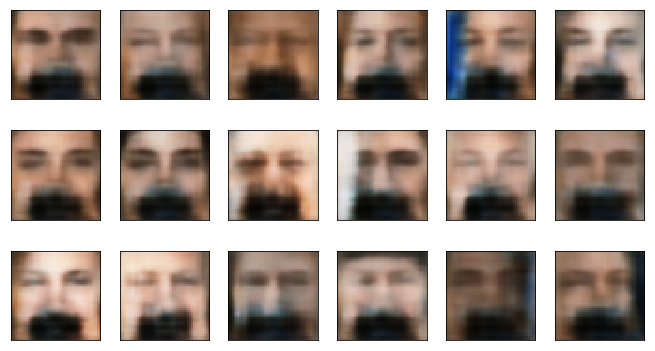

In [220]:
print('Лица с зачернеными участками после автоэнкодера')
plot_gallery(autoencoder.predict(generated_image), dimx, dimy)

Лица с зачернеными участками после вариационного автоэнкодера


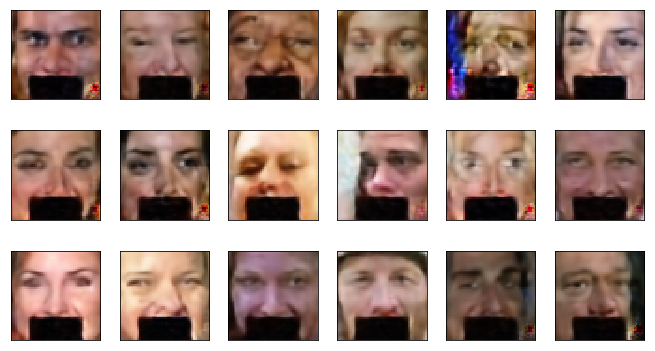

In [221]:
print('Лица с зачернеными участками после вариационного автоэнкодера')
plot_gallery(vae.predict(generated_image), dimx, dimy)

Лица с зачернеными участками после рса


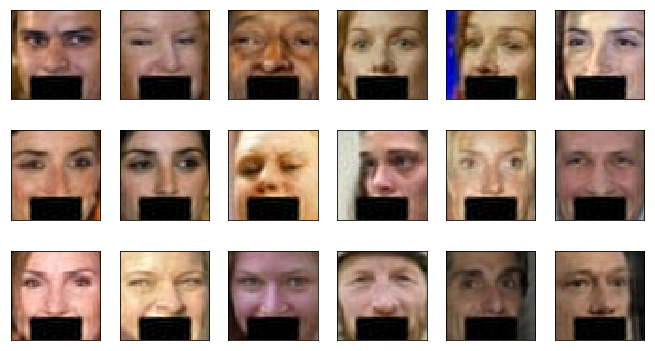

In [222]:
image_0_pca = pca.transform(generated_image.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))
generated_image_pca = pca.inverse_transform(image_0_pca).clip(0, 1).reshape(-1, IMAGE_H, IMAGE_W, N_CHANNELS)
print('Лица с зачернеными участками после рса')
plot_gallery(generated_image_pca, dimx, dimy)

Получили достаточно предсказуемый результат. 
Для того, чтобы модель могла восстанавливать искаженные изображения, необходимо использовать denoising autoencoder - т.е. такой автоэнкодер, который при обучении получает на вход зашумленные изображения, и при этом на выходе должен восстанавливать нормальное изображение. Т.е. обучение модели производится следующей командой: 

denoising_ae.fit(X_train_noisy, X_train)

### 7.2. Расчет вектора компенсации зачерненной области
Попробуем сделать трюк: рассчитаем вектор компенсации затемненной области. Для этого рассчитаем латентные векторы для исходных изображений, для изображений с затемненными участками, и вычтем одно из другого. После этого при восстановлении прибавим данный вектор и посмотрим, что получится.

Лица с зачернеными участками


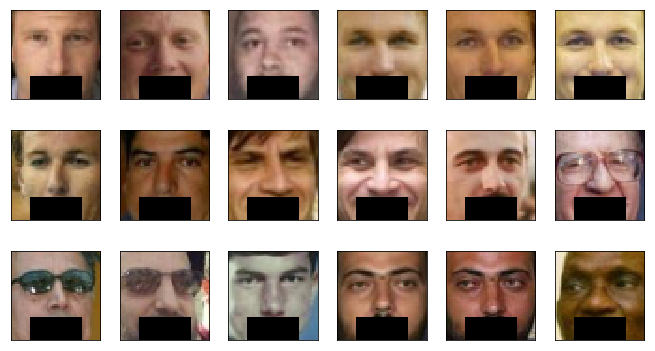

In [445]:
X_train_noise = np.copy(X_train) # Создадим зашумленную обучающую выборку
X_train_noise[:,box_x:box_x+box_h, box_y:box_y+box_w,:] = 0. # обнуляем данные в местах расположения прямоугольников
X_val_noise = np.copy(X_val)     # Создадим зашумленную валидационную выборку
X_val_noise[:,box_x:box_x+box_h, box_y:box_y+box_w,:] = 0.   # обнуляем данные в местах расположения прямоугольников
print('Лица с зачернеными участками')
plot_gallery(X_train_noise, dimx, dimy)
plt.show()

In [301]:
image_0_vae  = vae_encoder.predict(X_train_noise)[2]     # Латентные векторы зачерненных изображений для автоэнкодера
# Рассчитаем вектор для компенсации зачерненной собласти
vector_vae   = (vae_encoder.predict(X_train)[2] - image_0_vae).mean(axis = 0) # усредним компенсирующий вектор
vector_vae.shape

(512,)

In [304]:
decoded_imgs_vae = vae_decoder.predict(vae_encoder.predict(generated_image)[2] + vector_vae)

Исходные изображения


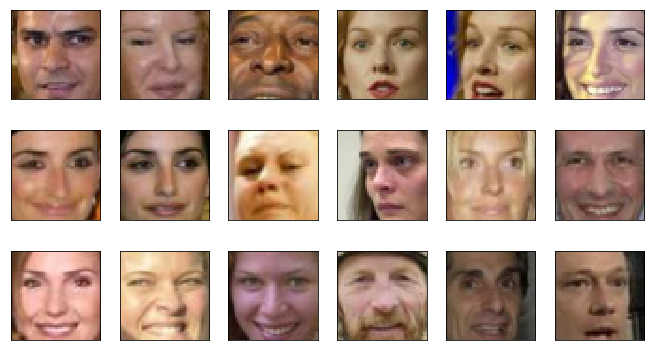

Изображения после компенсации зачерненной области вариационным автоэнкодером


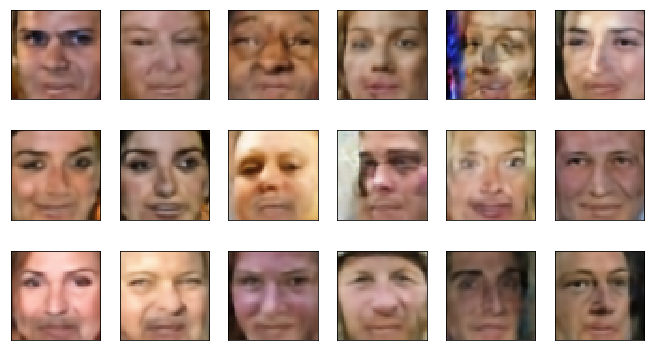

In [307]:
print('Исходные изображения')
plot_gallery(X_val, dimx, dimy)
plt.show()
print('Изображения после компенсации зачерненной области вариационным автоэнкодером')
plot_gallery(decoded_imgs_vae, dimx, dimy)
plt.show()

### 7.3. Посмотрим как будет работать РСА

In [308]:
# Расчитаем скрытое представление для зашумленных фото
X_train_noise_enc = pca.transform(X_train_noise.reshape(-1,IMAGE_H * IMAGE_W * N_CHANNELS ))

In [309]:
# Расчитаем вектор компенсации как разница между скрытым представлением исходных и зашумленных фото
noise_vector = pca.transform(X_train.reshape(-1,IMAGE_H * IMAGE_W * N_CHANNELS )) - X_train_noise_enc 

In [310]:
# Усредним вектор по всей выборке
noise_vector = noise_vector.mean(axis = 0)
noise_vector.shape

(576,)

In [311]:
# Рассчитаем вектора скрытого представления затемненых изображений и прибавим к ним компенсирующий вектор
image_0_pca = pca.transform(generated_image.reshape(-1, IMAGE_H * IMAGE_W * N_CHANNELS))
generated_image_pca = pca.inverse_transform(image_0_pca + noise_vector).clip(0, 1).reshape(-1, IMAGE_H, IMAGE_W, N_CHANNELS)

Исходные изображения


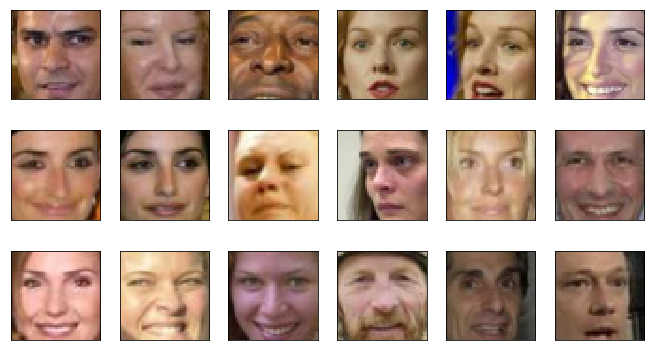

Лица с зачернеными участками после восстановления РСА


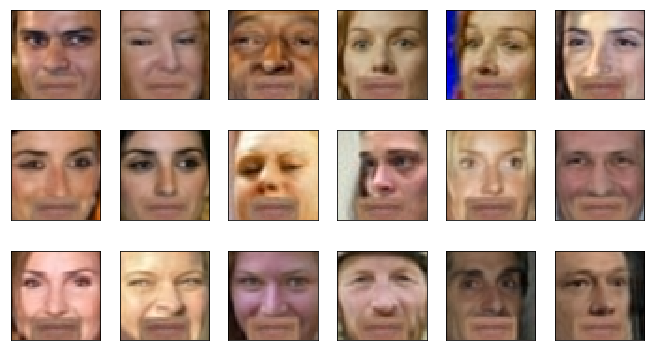

In [312]:
print('Исходные изображения')
plot_gallery(X_val, dimx, dimy)
plt.show()
print('Лица с зачернеными участками после восстановления РСА')
plot_gallery(generated_image_pca, dimx, dimy)
plt.show()

Восстановление обычным вариационным автоэнкодером показало лучший результат, чем РСА, но все равно видны артефакты.

### 7.3. Восстановление лиц с зачерненными участками с помощью denoising VAE

In [368]:
# Определим структуру нейронной сети для denoising энкодера
input_img = Input(shape=(IMAGE_H, IMAGE_W, N_CHANNELS))
x = input_img
x = Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)

# Сохраним shape скрытого представления для декодера
shape = K.int_shape(x)
latent_dim = 512 # Размерность латентных векторов для вариационного автоэнкодера

x = Flatten()(x)
#x = Dense(latent_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(x)
#z_mean = BatchNormalization()(z_mean)
z_log_var = Dense(latent_dim)(x)
#z_log_var = BatchNormalization()(z_log_var)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Создаем декодер в виде объекта
dvae_encoder = Model(input_img, [z_mean, z_log_var, z])
dvae_encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 24, 24, 16)   448         input_22[0][0]                   
__________________________________________________________________________________________________
batch_normalization_73 (BatchNo (None, 24, 24, 16)   64          conv2d_43[0][0]                  
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 12, 12, 32)   4640        batch_normalization_73[0][0]     
__________________________________________________________________________________________________
batch_norm

In [369]:
# Определим структуру нейронной сети для denoising декодера
encoded_input = Input(shape=(latent_dim,))
x = encoded_input
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(x)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same', strides=2)(x)
x = BatchNormalization()(x)
decoded = Conv2DTranspose(N_CHANNELS, (3, 3), activation='sigmoid', padding='same')(x)

# Создаем декодер в виде объекта
dvae_decoder = Model(encoded_input, decoded)
dvae_decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1152)              590976    
_________________________________________________________________
reshape_9 (Reshape)          (None, 3, 3, 128)         0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 3, 3, 128)         512       
_________________________________________________________________
conv2d_transpose_41 (Conv2DT (None, 6, 6, 128)         147584    
_________________________________________________________________
batch_normalization_78 (Batc (None, 6, 6, 128)         512       
_________________________________________________________________
conv2d_transpose_42 (Conv2DT (None, 12, 12, 64)        73792     
__________

In [370]:
outputs = dvae_decoder(dvae_encoder(input_img)[2])
# Создаем denoising автоэнкодер в виде объекта
dvae = Model(input_img, outputs)
dvae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 48, 48, 3)         0         
_________________________________________________________________
model_29 (Model)             [(None, 512), (None, 512) 1279072   
_________________________________________________________________
model_30 (Model)             (None, 48, 48, 3)         837347    
Total params: 2,116,419
Trainable params: 2,115,203
Non-trainable params: 1,216
_________________________________________________________________


In [371]:
# Функция потреь для вариационного автоэнкодера
def vae_loss(input_img, output):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(output-input_img))
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + 2 * z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all images in batch
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    return total_loss

#dvae.compile(optimizer='adadelta', loss=vae_loss)
dvae.compile(optimizer='adadelta', loss=vae_loss)

In [384]:
r = dvae.fit(X_train_noise, X_train,
            epochs=500,
            batch_size= 256,
            shuffle=True,
            validation_data=(X_val_noise, X_val),
            )

Train on 10000 samples, validate on 3143 samples
Epoch 1/500
10000/10000 [==============================] - 3s 317us/step - loss: 9937.5563 - val_loss: 15044.0473
Epoch 2/500
10000/10000 [==============================] - 3s 309us/step - loss: 9969.5604 - val_loss: 18689.6660
Epoch 3/500
10000/10000 [==============================] - 3s 309us/step - loss: 9982.2640 - val_loss: 13349.6217
Epoch 4/500
10000/10000 [==============================] - 3s 309us/step - loss: 9762.6919 - val_loss: 14149.2186
Epoch 5/500
10000/10000 [==============================] - 3s 308us/step - loss: 9531.0058 - val_loss: 25240.3235
Epoch 6/500
10000/10000 [==============================] - 3s 310us/step - loss: 9375.4003 - val_loss: 16657.3150
Epoch 7/500
10000/10000 [==============================] - 3s 311us/step - loss: 9335.6104 - val_loss: 15244.1733
Epoch 8/500
10000/10000 [==============================] - 3s 310us/step - loss: 9001.0688 - val_loss: 13500.5003
Epoch 9/500
10000/10000 [==============

10000/10000 [==============================] - 3s 310us/step - loss: 4694.4332 - val_loss: 6667.0022
Epoch 144/500
10000/10000 [==============================] - 3s 310us/step - loss: 4637.1848 - val_loss: 8021.5411
Epoch 145/500
10000/10000 [==============================] - 3s 311us/step - loss: 4591.5701 - val_loss: 6254.0465
Epoch 146/500
10000/10000 [==============================] - 3s 310us/step - loss: 4588.6364 - val_loss: 6673.4503
Epoch 147/500
10000/10000 [==============================] - 3s 309us/step - loss: 4543.9472 - val_loss: 6749.4559
Epoch 148/500
10000/10000 [==============================] - 3s 310us/step - loss: 4542.3162 - val_loss: 6368.8437
Epoch 149/500
10000/10000 [==============================] - 3s 309us/step - loss: 4639.6300 - val_loss: 6519.1641
Epoch 150/500
10000/10000 [==============================] - 3s 309us/step - loss: 4623.9017 - val_loss: 6336.7314
Epoch 151/500
10000/10000 [==============================] - 3s 309us/step - loss: 4582.3869 -

10000/10000 [==============================] - 3s 309us/step - loss: 3964.9024 - val_loss: 6164.5272
Epoch 286/500
10000/10000 [==============================] - 3s 309us/step - loss: 3881.2175 - val_loss: 5916.6224
Epoch 287/500
10000/10000 [==============================] - 3s 310us/step - loss: 3957.9575 - val_loss: 6021.1019
Epoch 288/500
10000/10000 [==============================] - 3s 310us/step - loss: 3902.3851 - val_loss: 5858.9737
Epoch 289/500
10000/10000 [==============================] - 3s 309us/step - loss: 3963.7142 - val_loss: 6202.8895
Epoch 290/500
10000/10000 [==============================] - 3s 309us/step - loss: 3940.2666 - val_loss: 5911.6584
Epoch 291/500
10000/10000 [==============================] - 3s 309us/step - loss: 3877.5813 - val_loss: 5858.1123
Epoch 292/500
10000/10000 [==============================] - 3s 309us/step - loss: 3890.4120 - val_loss: 6098.0083
Epoch 293/500
10000/10000 [==============================] - 3s 310us/step - loss: 3890.3300 -

10000/10000 [==============================] - 3s 310us/step - loss: 3600.2434 - val_loss: 5814.3564
Epoch 428/500
10000/10000 [==============================] - 3s 310us/step - loss: 3596.4003 - val_loss: 5704.3343
Epoch 429/500
10000/10000 [==============================] - 3s 310us/step - loss: 3622.5573 - val_loss: 5758.0706
Epoch 430/500
10000/10000 [==============================] - 3s 310us/step - loss: 3548.7889 - val_loss: 5776.6426
Epoch 431/500
10000/10000 [==============================] - 3s 310us/step - loss: 3588.3120 - val_loss: 5706.2537
Epoch 432/500
10000/10000 [==============================] - 3s 310us/step - loss: 3600.2436 - val_loss: 5627.9997
Epoch 433/500
10000/10000 [==============================] - 3s 310us/step - loss: 3611.6842 - val_loss: 5757.5148
Epoch 434/500
10000/10000 [==============================] - 3s 310us/step - loss: 3575.0171 - val_loss: 5723.6960
Epoch 435/500
10000/10000 [==============================] - 3s 309us/step - loss: 3589.0426 -

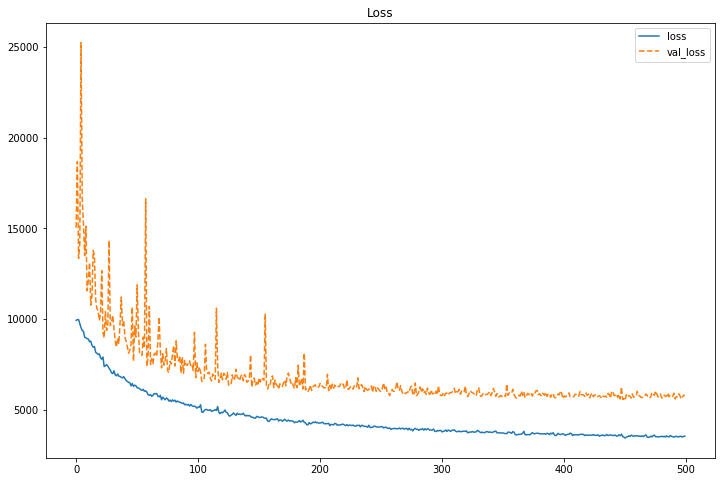

In [385]:
# Выведем график обучения
plt.figure(figsize=(12,8))
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], linestyle = "--", label='val_loss')
plt.title('Loss')
plt.legend()

In [444]:
dvae_encoder.save_weights('dvae_conv_enc.h5')
dvae_decoder.save_weights('dvae_conv_dec.h5')
dvae.save_weights('dvae_conv_all.h5')

Изображения из обучающей выборки


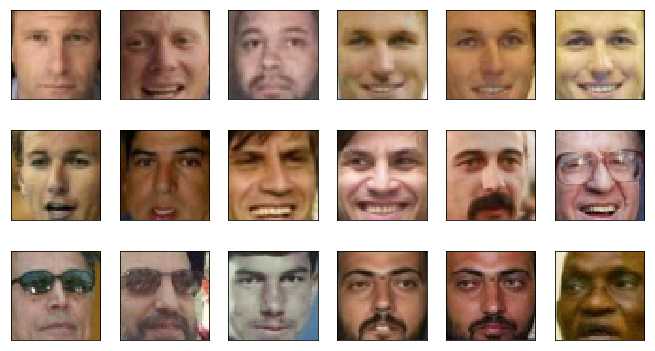

Изображения из искаженной обучающей выборки, восстановленные с помощью denoising VAE


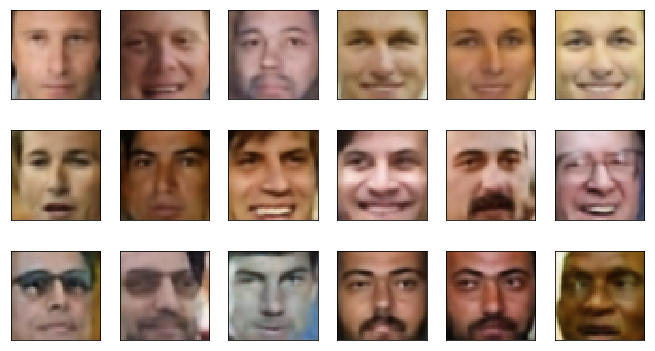

In [387]:
print('Изображения из обучающей выборки')
plot_gallery(X_train, dimx, dimy)
plt.show()
print('Изображения из искаженной обучающей выборки, восстановленные с помощью denoising VAE')
plot_gallery(dvae.predict(X_train_noise[:18]), dimx, dimy)
plt.show()

Изображения из валидационной выборки


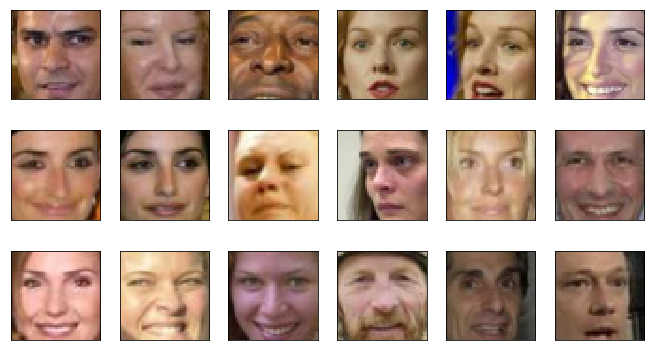

Изображения из искаженной валидационной выборки, восстановленные с помощью denoising VAE


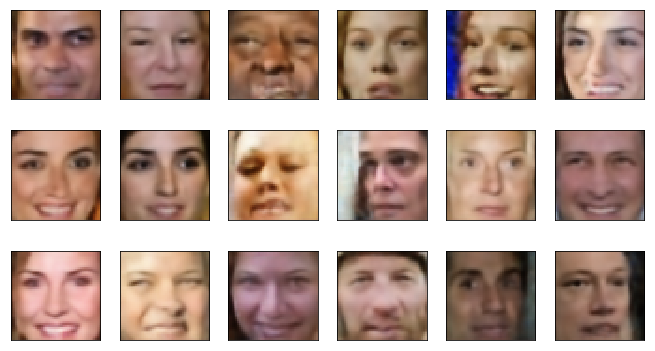

In [388]:
print('Изображения из валидационной выборки')
plot_gallery(X_val, dimx, dimy)
plt.show()
print('Изображения из искаженной валидационной выборки, восстановленные с помощью denoising VAE')
plot_gallery(dvae.predict(X_val_noise[:18]), dimx, dimy)
plt.show()

Таким образом denoising VAE показал наиболее интересные результаты при восстановлении изображений с затемнеными участками.

## Выводы <a class="anchor" id="eigth-bullet"></a>
[К содержанию](#zero-bullet)

Эксперименты показали, что автоэнкодеры являются перспективным инструментом при работе с сигналами, которые по своей структуре похожи на двумерные изображения.
В нефтегазовом секторе автоэнкодеры представляют интерес для решения следующих задач:

1) Получение компактного образа сигнала для его дальнейшей передачи. Таким образом достигается эффективное сжатие данных.

2) Использование случайных латентных векторов для генерации новых данных. Это актуально в задачах моделирования.

3) Очистка сигналов от шумов (например, связанных с помехами в линии связи при передаче данных), а также восстановление исходного сигнала в случае потерь некоторой части информации (пример с черными прямоугольниками).

4) Генерация данных с нужными свойствами (как это было в примере с "дорисовыванием" улыбок) - актуально для отработки различных ситуаций и моделирования помех определенного рода.

5) Анализ сигналов в их латентном представлении для выделения векторов интересующих свойств (как это было в примере с вычислением вектора "улыбки" или вектора "черного прямоугольника"). Это актуально для теоретического понимания структуры многомерных сигналов.

Также не стоит забывать о бейзлайне в виде стандартного метода главных компонент РСА: в некоторых задачах он дает хороший результат, причем за гораздо меньшее (до 100 раз) время.